In [4]:
%matplotlib notebook

In [5]:
# loading standard modules
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2grey
# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1 import Figure, LiveWirePresenter

In [6]:
class BFS:
    white_color = 0
    gray_color  = 1
    black_color = 2

    def __init__(self, img):
        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]
        
        # tuple declaration
        shape = (num_cols,num_rows)
        
        # instance variables (initializing numpy arrays)
        self.colors = np.empty(shape, dtype=int)
        self.predec_xs = np.empty(shape, dtype=int)
        self.predec_ys = np.empty(shape, dtype=int)
        self.paths_computed_ = False

        # 4-neighbors graph
        self.neighbor_xs = [0, 1,  0, -1]
        self.neighbor_ys = [1, 0, -1,  0]

        # 8-neighbors graph
        #self.neighbor_xs = [0, 1, 1,  1,  0, -1, -1, -1]
        #self.neighbor_ys = [1, 1, 0, -1, -1, -1,  0,  1]
        
        # grayscale grid of "brightness" values in numerical range 0 to 255 (uint8)
        #self.intensities = img_as_ubyte(rgb2grey(img))

    def paths_computed(self):
        return self.paths_computed_

    def compute_paths_starting_at(self, sx, sy):
        self.paths_computed_ = False

        num_rows = self.num_rows
        num_cols = self.num_cols

        colors = self.colors
        predec_xs = self.predec_xs
        predec_ys = self.predec_ys

        neighbor_xs = self.neighbor_xs
        neighbor_ys = self.neighbor_ys
        num_neighbors = len(neighbor_xs)

        colors.fill(BFS.white_color)
        colors[sx,sy] = BFS.gray_color

        predec_xs[sx,sy] = sx
        predec_ys[sx,sy] = sy
        
        # setting up for BFS
        queue = []
        queue.append((sx,sy))
        
        while len(queue) != 0:
            x,y = queue.pop(0)

            for k in xrange(num_neighbors):
                nx = x + neighbor_xs[k]
                ny = y + neighbor_ys[k]
                
                # as long as we have valid coordinate
                if 0 <= nx and nx < num_cols and 0 <= ny and ny < num_rows:
                    # if color of neighbor is white, change to gray
                    if colors[nx,ny] == BFS.white_color:
                        colors[nx,ny] = BFS.gray_color
                        # setting predecessor path
                        predec_xs[nx,ny] = x
                        predec_ys[nx,ny] = y
                        # queue up neighbor
                        queue.append((nx,ny))
            # set current color to black??
            colors[x,y] = BFS.black_color
    
        self.paths_computed_ = True        

    def get_path_to(self, x, y):
        xs = []
        ys = []

        xs.append(x)
        ys.append(y)

        predec_xs = self.predec_xs
        predec_ys = self.predec_ys

        while predec_xs[x,y] != x or predec_ys[x,y] != y:
            x,y = predec_xs[x,y],predec_ys[x,y]
            xs.append(x)
            ys.append(y)
    
        return xs,ys

In [7]:
class MyLiveWire:
    def __init__(self, img):
        self.fig = Figure()
        self.alg = BFS(img)
        self.pres = LiveWirePresenter(img, self.alg)
        self.pres.connect_figure(self.fig)

    def run(self):
        self.fig.show()

### Notes about the live-wire interface:
1. To deliniate a segment boundary (left) click on some point on this boundary.
2. "on_mouse_down" function in "LiveWirePresenter" (implemented in asg1.py) responds to this event by calling "compute_paths_starting_at" function in "alg" object (in the provided version it is BFS, but you should replace it by a LiveWire object with a properly implemented function of the same name). That functions should compute and store paths from all pixels to the specified seed. Note that LiveWire object should compute "shortest paths" on a properly weighted grid graph. BFS above computes some other paths.
3. As the mouse "glides" over the image after each click, "LiveWirePresenter" receives calls to "on_mouse_over" function that calls "get_path_to" in the "alg". This method should return a sequence of points on a path from the last click to the current mouse position. This path is then visualized as a red "livewire".
4. At each new left click the current "red" path is appended to a fixed (blue) contour and "compute_paths_starting_at" is called to recompute paths to the new seed.
5. A right click closes the contour as follows: it appends the current red path to the fixed blue contour, calls "compute_paths_starting_at" the (right) click, gets the path from the starting point of the blue contour to the (right) click, and appends this path to the blue contour (closing it).
6. No new clicks are processed after the contour is closed.

### Summary: 
You only need to replace BFS object by your LiveWire object implementation with 
proper "compute_paths_starting_at" and "get_path_to" functions. All the GUI details are handled by the fully implemented "LiveWirePresenter" object.

<IPython.core.display.Javascript object>


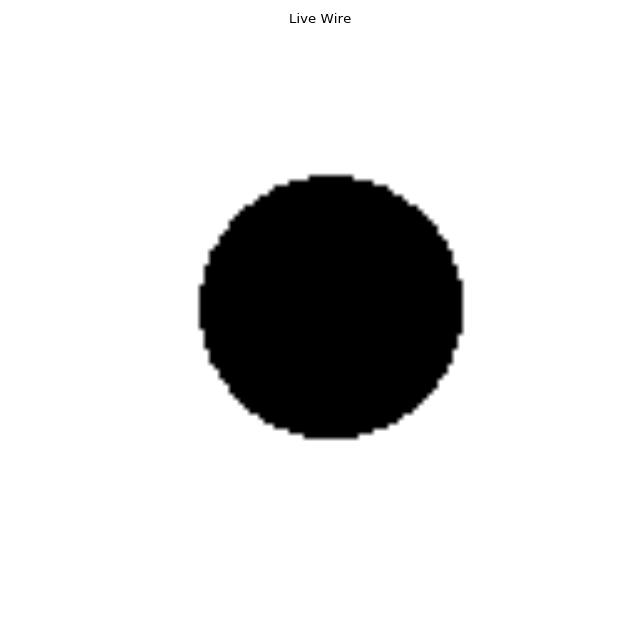

In [10]:
img = plt.imread('images\\test3.bmp')
img = rgb2grey(img)
app = MyLiveWire(img[:100,:100])
app.run()